<a href="https://colab.research.google.com/github/Rahulchauhan1612/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

#Abstract:

Bike sharing as we know is a transport service primary focus to lend conventional or electrical bikes to an individual or a group of individuals in order to let them travel in city or outskirt in rent for an hour, a day or for a month depending on the needs.

In market share we can see that Bike Sharing system has a global market share which was valued around 3.39 billion Dollars in 2019 and is projected to grow to 6.98 Billion Dollars by 2027 with a compound annual growth rate of around 14% indicatively from 2020 to 2027.

Several factors such as low bike rent, increase in capital investments,introduction of e-bikes in the market, technological advancement and government schemes for development of several bike-sharing infrastructure has increased the overall market share and led to the introduction of several opportunities during the forecasted year. However, rise in bike theft and huge initial investment are some of the key factors in order to hinder expected market growth.

*# Keywords: Bike-Sharing, Data Mining, Predictive Analysis, Linear Regression, Machine Learning.*

# **Introduction:**

Bike sharing system demand nowadays is increasing in proportional manners globally. This system has gained a lot of attention with its cost effective system and easy to use nature. This system has already attracted a huge customer base globally like in South Korea, São Paulo ,China and Australia. Bike sharing system generally rents bikes on an hour, day and month basis and is generally based on static pricing inclusive of hour,days or month. Because of its affordability and easy renting system anyone can commute on arrival. According to our problem our main aim is to build a predictive model so as to find the number of bikes rented based on the given dataset.

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing required modules and loading dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{'grid.linestyle': '--'})


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Supervised ML - Regression/SeoulBikeData.csv",encoding= 'unicode_escape')

df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Getting shape of the data
df.shape

(8760, 14)

In [ ]:
# Getting details about all the features present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Here we can see there are ***6 float, 4 int , 4 object or str type data*** available in the dataset. 

Also there is ***8760 rows*** and ***14 columns*** or feature. Also there is **8760 not null values**. 

We can conclude all of the above after final feature engineering:(i.e feature creation,feature selection etc)

## **# Feature Description :-**

1. Date : Date feature which is str type is needed to convert it into Datetime format DD/MM/YYYY.
2.Hour: Hour feature which is in 24 hour format which tells us number bike rented per hour is int type.
3.Temperature(°C): Temperature feature which is in celsius scale(°C) is Float type.
4.Humidity(%): Feature humidity in air (%) which is int type.
5.Wind speed (m/s) : Wind Speed feature which is in (m/s) is float type.
6.Visibility (10m): Visibility feature which is in 10m, is int type.
7.Dew point temperature(°C): Dew point Temperature in (°C) which tells us temperature at the start of the day is Float type.
8.Solar Radiation (MJ/m2): Solar radiation or UV radiation is Float type.
9.Rainfall(mm): Rainfall feature in mm which indicates 1 mm of rainfall which is equal to 1 litre of water per metre square is Float type.
10.Snowfall (cm): Snowfall in cm is Float type. Seasons: Season, in this feature four seasons are present in data is str type.
11.Holiday: whether no holiday or holiday can be retrieved from this feature is str type.
12.Functioning Day: Whether the day is Functioning Day or not can be retrieved from this feature is str type.

# **#Processing the dataset :-**



In [ ]:
# Checking for duplicated values
len(df[df.duplicated()])

0

In [ ]:
# Checking for total null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

 **No duplicate records are found in the dataset.Now we can proceed further**

**Breaking down Date column into 3 columns, namely Day, Month, Year.**

In [ ]:
#Using Lambda function to strip date from string to Datetime format so to retrieve d,m,y
df['Date'] = df['Date'].apply(lambda x:dt.strptime(x, "%d/%m/%Y"))
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,2018


In [ ]:
# Lets add a new column named Weekend with binary values, indicating 1 for weekend and 0 for a weekday

df['Weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [ ]:
#Dropping columns in vertical axis
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [ ]:
#counting Functioning Day using value value_count
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64


### **#Exploratory Data Analysis :-**

Text(0, 0.5, 'Average Rented bikes per day')

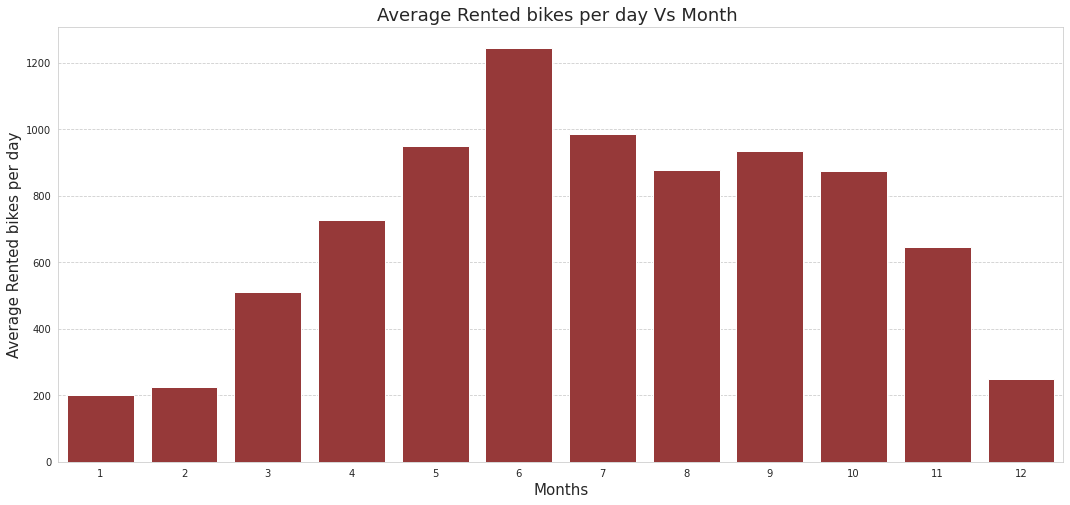

In [ ]:
# Visualisation of number of rented bikes vs Months:

fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='Month',y='Rented Bike Count',color = 'brown' , ci=None)
ax.set_title('Average Rented bikes per day Vs Month ' , fontsize=18)
ax.set_xlabel('Months',fontsize=15)
ax.set_ylabel('Average Rented bikes per day',fontsize=15)

Text(0, 0.5, 'Average Rented Bikes per day')

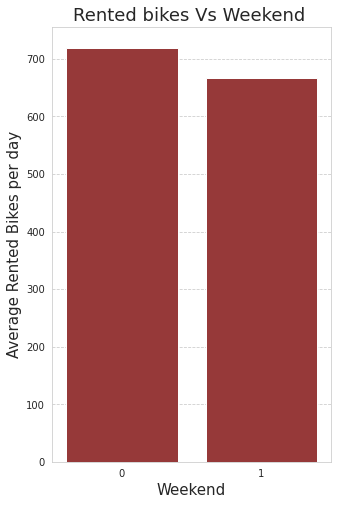

In [ ]:
# Visualisation of average number of rented bikes vs Weekday or Weekend:

fig,ax=plt.subplots(figsize=(5,8))
sns.barplot(data=df,x='Weekend',y='Rented Bike Count',ax=ax,ci=None , color ='brown')
ax.set_title('Rented bikes Vs Weekend ' , fontsize=18)
ax.set_xlabel('Weekend',fontsize=15)
ax.set_ylabel('Average Rented Bikes per day',fontsize=15)

Text(0, 0.5, 'Rented Bikes')

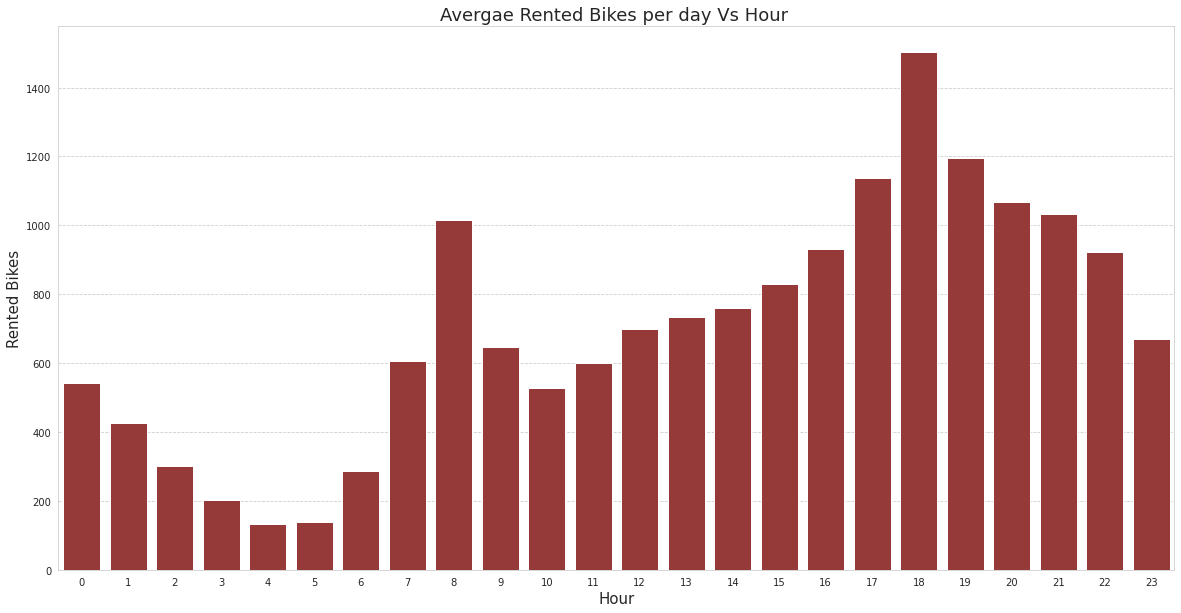

In [ ]:
# Visualisation of Rented bikes vs Hour of the Day:

fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ci= None ,  color ='brown')
ax.set_title('Avergae Rented Bikes per day Vs Hour ', fontsize=18)
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)

Text(0, 0.5, 'Rented Bikes')

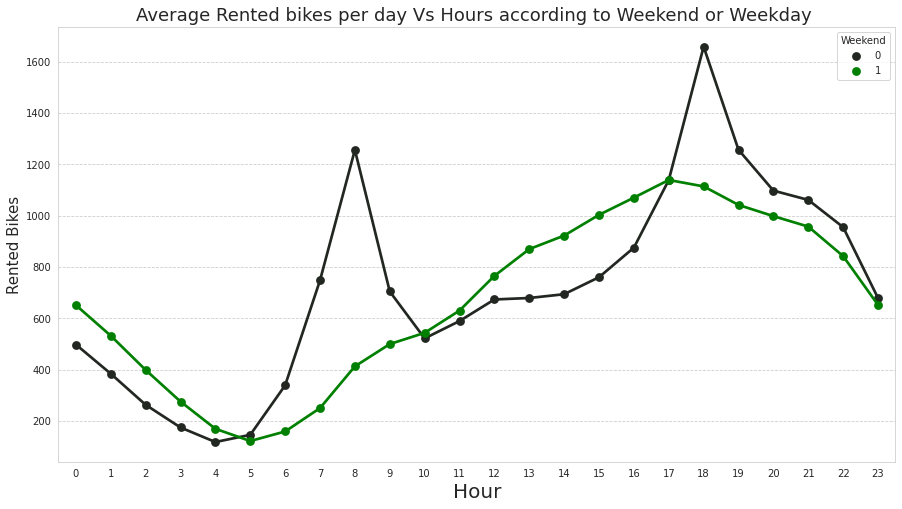

In [ ]:
# Visualisation of Average Rented bikes vs Hour of the Day by Weekend or Weeknday:

fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Weekend',ci= None, color ='green' )
ax.set_title('Average Rented bikes per day Vs Hours according to Weekend or Weekday ' , fontsize=18)
ax.set_xlabel('Hour',fontsize=20)
ax.set_ylabel('Rented Bikes',fontsize=15)

From this visualizalisation we can conclude the following:

1. In ***Average Bike Rented vs Hour*** we can clearly see that at ***6:00 PM*** average number of bike rented by the people was ***1550***. While at ***00.00 or at midnight*** average bike rented was lowest with just around ***550 bikes*** which were ***on weekdays***.

2. In ***Average Bike Rented vs Hou***r we can also see that at 5:00 PM average number of bike rented by the people was around ***1150***. While at **00.00 or at midnight** average bike rented was lowest with just around ***650 bikes*** which were ***on weekend***.

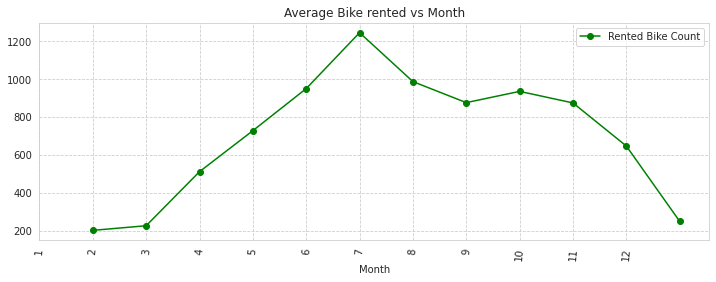

In [ ]:
# Visualisation of Average Bike rented vs Month:

avg_bike=df.groupby('Month')['Rented Bike Count'].mean()
plt.figure(figsize=(12,4))
s=avg_bike.plot(legend=True, marker='o',title=f'Average Bike rented vs Month',color='green')
s.set_xticks(range(len(avg_bike)))
s.set_xticklabels(avg_bike.index.tolist(),rotation = 85)
plt.show()



*  In ***Average Bike Rented vs Month*** we can clearly see that Average Bike rented in*** July*** was highest around ***1250*** and Average Bike Rented during month of ***February*** was the Lowest with just **200** average bike.




Text(0, 0.5, 'Average Rented Bikes')

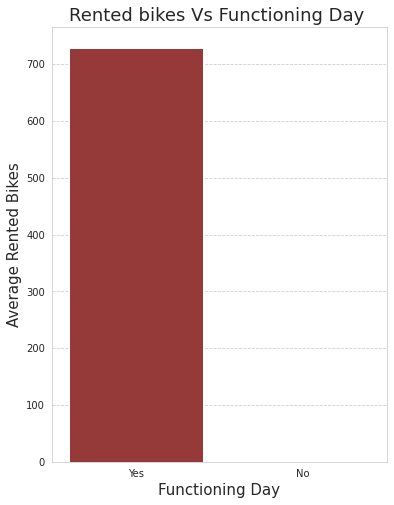

In [ ]:
# Analysis of rented Bikes Vs Functioning Day:

fig,ax=plt.subplots(figsize=(6,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count', ci=None,color = 'brown' )
ax.set_title('Rented bikes Vs Functioning Day ', fontsize=18)
ax.set_xlabel('Functioning Day',fontsize=15)
ax.set_ylabel('Average Rented Bikes',fontsize=15)



*   From this Bar Plot we can conclude that Bikes are rented only on **functioning day.**




Text(0, 0.5, 'Rented Bikes')

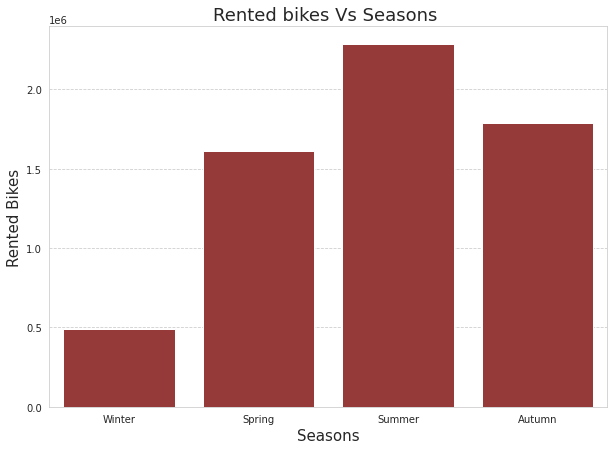

In [ ]:
# Analysis of Rented Bikes Vs Seasons:

fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count', color ='brown', ci= None , estimator= sum)
ax.set_title('Rented bikes Vs Seasons ' , fontsize=18)
ax.set_xlabel('Seasons',fontsize=15)
ax.set_ylabel('Rented Bikes',fontsize=15)



*   From this Bar Plot we can see that ***Highest number of bikes*** were rented during ***Summer seasons*** while **least number of bikes** were rented during ***Winter seasons***.




Text(0, 0.5, 'Rented Bikes')

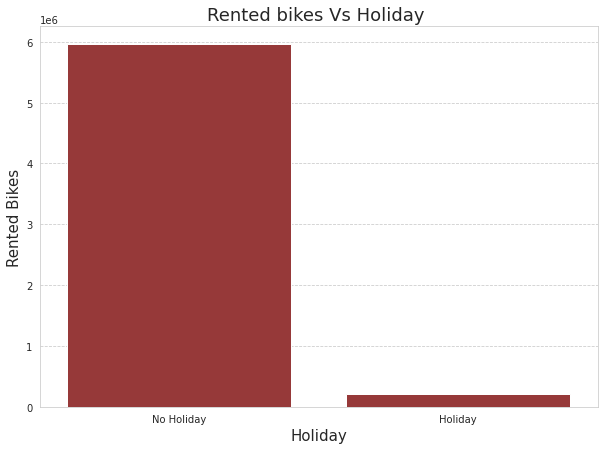

In [ ]:
# Analysis of Rented Bikes Vs Holiday or not:

fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count', color ='brown', ci= None , estimator= sum)
ax.set_title('Rented bikes Vs Holiday ' , fontsize=18)
ax.set_xlabel('Holiday',fontsize=15);
ax.set_ylabel('Rented Bikes',fontsize=15)



*   Here we can assume that Bikes were rented more when there is no holiday and very less as on Holidays.




### **#Analyze numerical Variables :-** 


In [ ]:
#Storing all the numeric features in a variable list

numeric_features = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


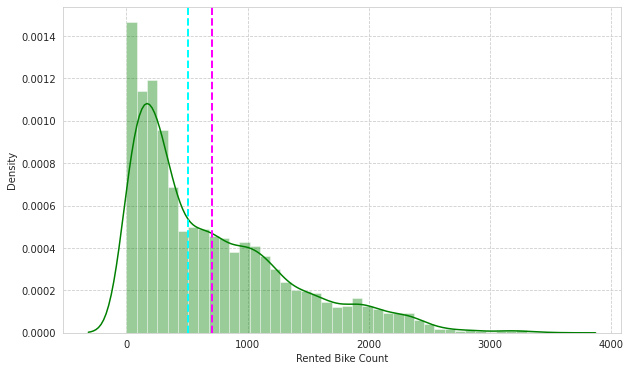

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


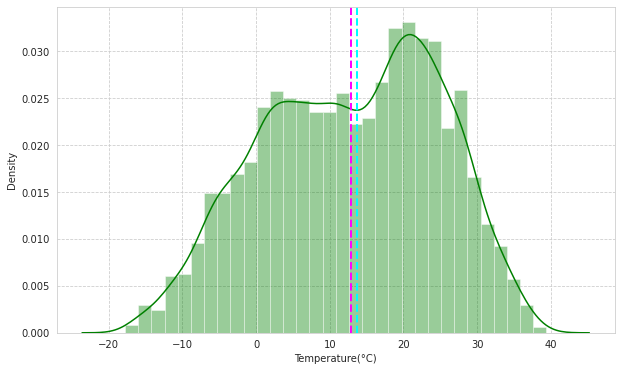

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


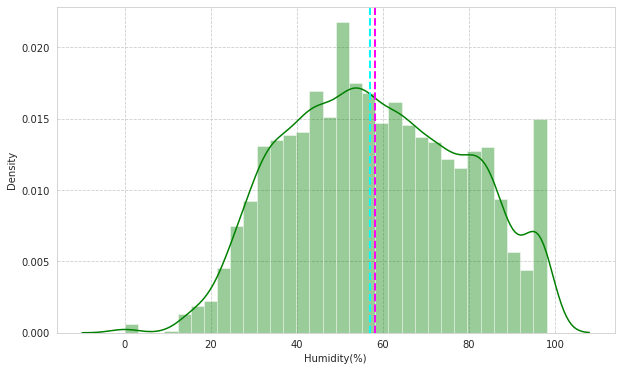

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


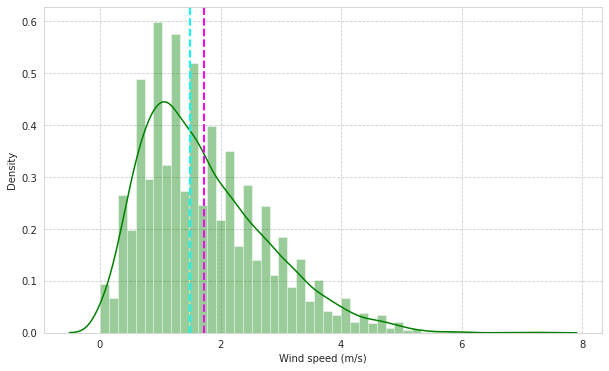

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


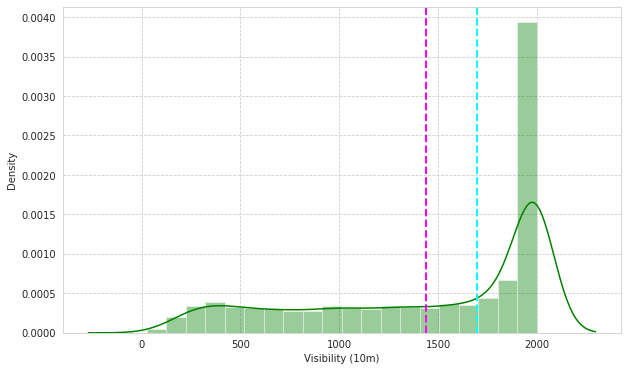

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


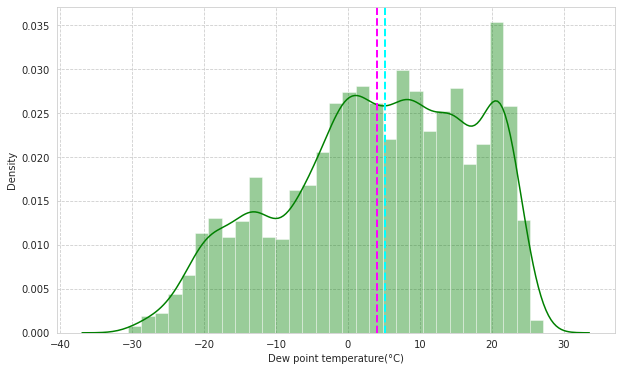

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


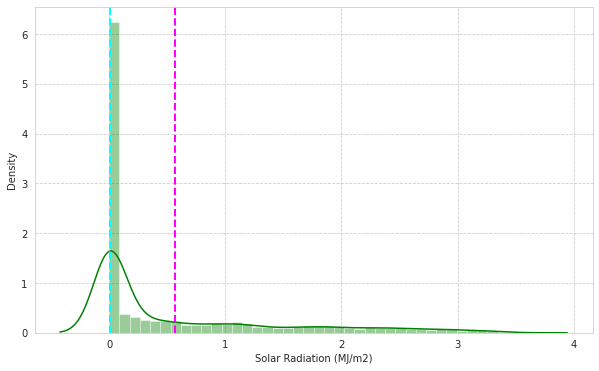

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


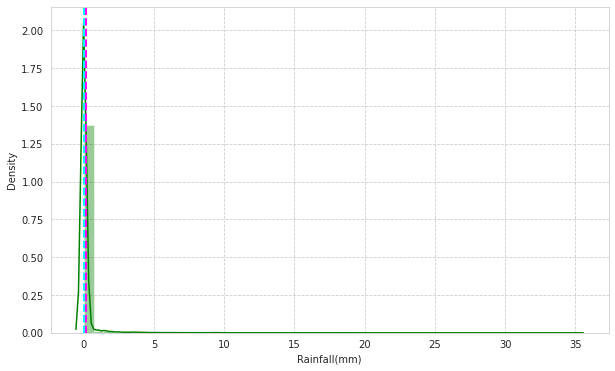

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


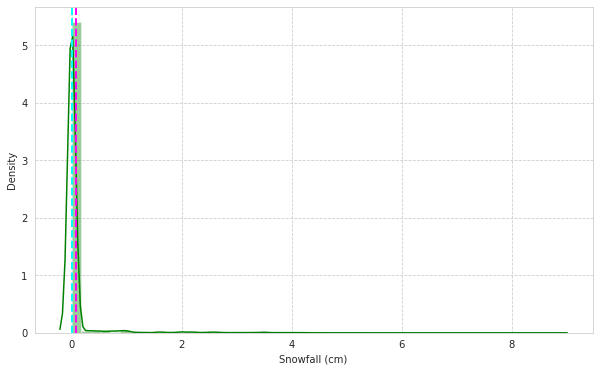

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col] , color ='green')
  plt.xlabel(col)
  plt.axvline(df[col].mean(),color='magenta', linestyle='dashed',linewidth=2)
  plt.axvline(df[col].median(),color='cyan', linestyle='dashed',linewidth=2)
  plt.show()
plt.show()

1.In density plot for*** Rented Bike Count*** we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its ***positively skewed***.

2.In density plot for ***Temperature*** we can see that median is greater than mean we can say to some extend that this is ***negatively skewed***.

3.In density plot for ***Humidity*** we can see that mean is greater than median we can say to some extend that this is ***positively skewed***.

4.In density plot for ***WindSpeed*** we can see that mean is greater than median we can say to some extend that this is ***positively skewed***.

5.In density plot for ***Visibility*** we can see that median is greater than mean we can say to some extend that this is ***negatively skewed***.

6.In density plot for ***Dew Point Temperature*** we can see that median is greater than mean we can say to some extend that this is ***negatively skewed***.

7.In density plot for ***Solar Radiation*** we can see that mean is greater than median we can say that this is*** positively skewed***.

## **#Feature Engineering :-**

### Regression plot:-

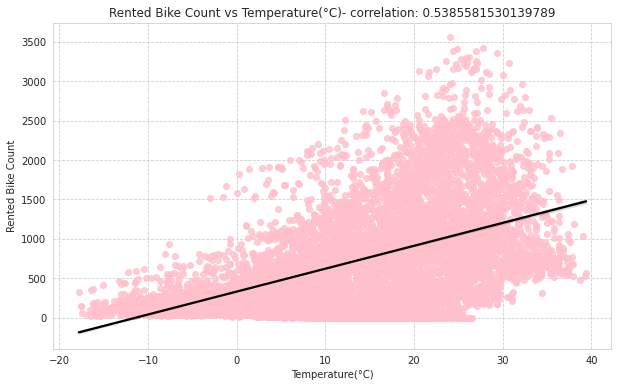

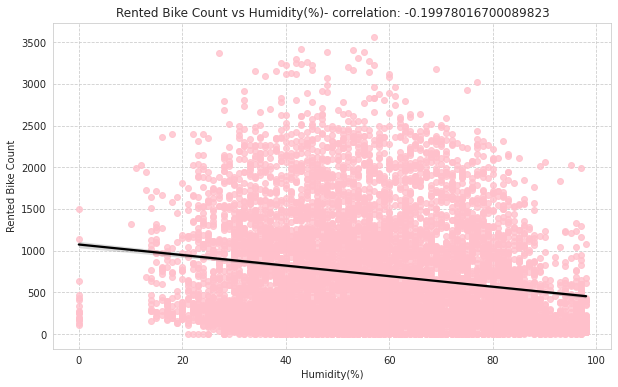

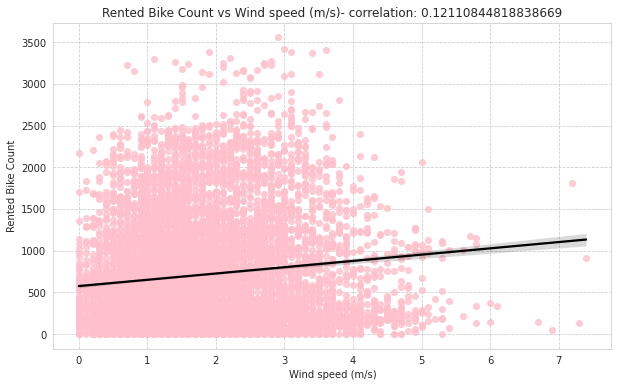

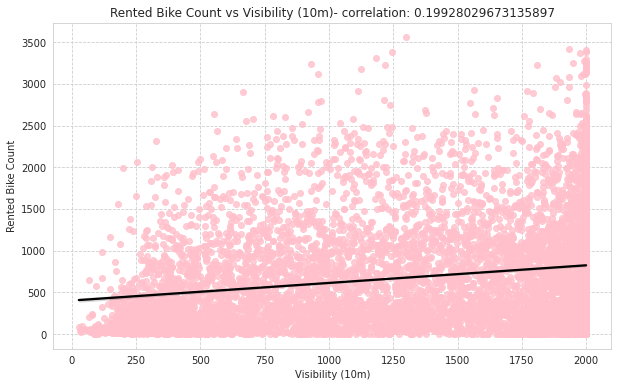

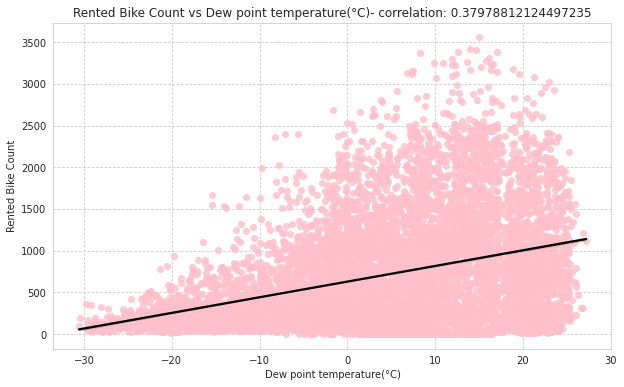

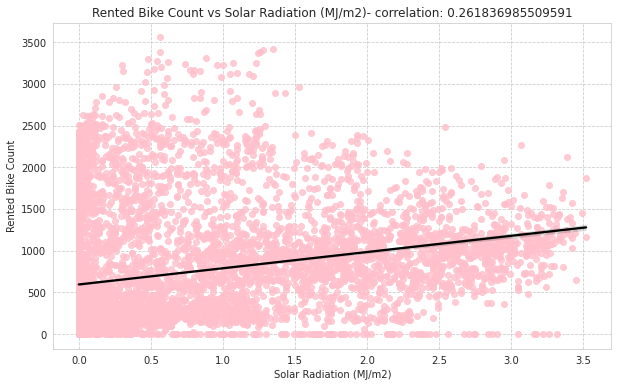

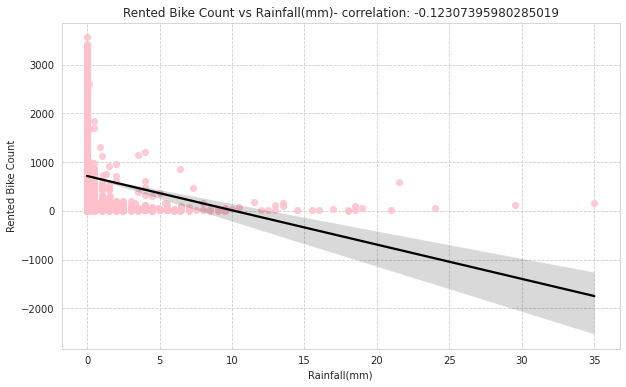

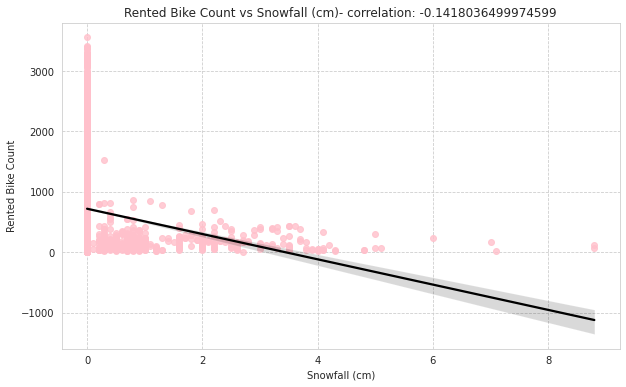

In [ ]:
#printing the regression plot for all the numerical features:

for col in numeric_features[1:]:
  feature = df[col]
  label = df['Rented Bike Count']
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})
  correlation = feature.corr(label)
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))

From the above regression plots we can conclude that the columns.

*   ***'Rainfall', 'Snowfall', 'Humidity'*** these features are ***negatively ***related with the dependent variaable.
*  ***'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation'*** are **positively** correlated with the dependent variable.



In [ ]:
# Check the correlation plot:

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekend
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.133514,-0.036467
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,-0.000000
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.216183,0.007214
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.139875,-0.016951
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.156710,-0.022227
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.064874,-0.026762
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.242552,-0.006990
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.031595,0.012975
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.011958,-0.014151
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.053121,-0.006759


Temperature and Dew point temperature has highest correlation. Since for Linear Regression model, it is assumed that there is no multi-collinearity between Independent variables, we have remove multi-collinearity from this dataset.

## **#Checking VIF:-**

In [ ]:
# Definig function for VIF:

def calc_vif(X):
 
   # Calculating VIF:
   
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day', 'Month', 'Year']]])

,variables,VIF
0,Hour,4.418398
1,Temperature(°C),33.984042
2,Humidity(%),5.617480
3,Wind speed (m/s),4.809775
4,Visibility (10m),9.106191
5,Dew point temperature(°C),17.505235
6,Solar Radiation (MJ/m2),2.882383
7,Rainfall(mm),1.081868
8,Snowfall (cm),1.120882
9,Weekend,1.409388


Since **Temperature has highest VIF** followed by Dew Point Temperature, we will check for VIF of features without Temperature.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day', 'Month', 'Year','Temperature(°C)']]])

,variables,VIF
0,Hour,3.855654
1,Humidity(%),5.462400
2,Wind speed (m/s),4.730040
3,Visibility (10m),4.980916
4,Dew point temperature(°C),1.663850
5,Solar Radiation (MJ/m2),1.925305
6,Rainfall(mm),1.080447
7,Snowfall (cm),1.111735
8,Weekend,1.384555


After **dropping temperature**, VIF is in acceptable range, therefore we will drop temperature from our dataset.

In [ ]:
df=df.drop(['Temperature(°C)'],axis=1)

In [ ]:
# Checking correlation plot after dropping Temperature:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekend
Rented Bike Count,1.000000,0.410257,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.133514,-0.036467
Hour,0.410257,1.000000,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,-0.000000
Humidity(%),-0.199780,-0.241644,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.139875,-0.016951
Wind speed (m/s),0.121108,0.285197,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.156710,-0.022227
Visibility (10m),0.199280,0.098753,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.064874,-0.026762
Dew point temperature(°C),0.379788,0.003054,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.242552,-0.006990
Solar Radiation (MJ/m2),0.261837,0.145131,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.031595,0.012975
Rainfall(mm),-0.123074,0.008715,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.011958,-0.014151
Snowfall (cm),-0.141804,-0.021516,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.053121,-0.006759
Month,0.133514,0.000000,0.139875,-0.156710,0.064874,0.242552,-0.031595,0.011958,0.053121,1.000000,0.012839


In [ ]:
# Ordinal encoding:

df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
df

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,11,0
8756,764,20,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,11,0
8757,694,21,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,11,0
8758,712,22,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,11,0


In [ ]:
# One Hot Encoding:

df_seasons=pd.get_dummies( df['Seasons'] )
df_month=pd.get_dummies( df['Month'] , prefix = 'Month')
df_hour=pd.get_dummies( df['Hour'] ,prefix = 'Hour' )

In [ ]:
# Join one hot encoded columns:

df=df.join([df_seasons,df_month,df_hour])

In [ ]:
df=df.drop(columns = ['Hour', 'Seasons' ,'Month'])

In [ ]:
df.columns

Index(['Rented Bike Count', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Weekend', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

### **#Checking Distribution Rented Bike Count column data:-**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


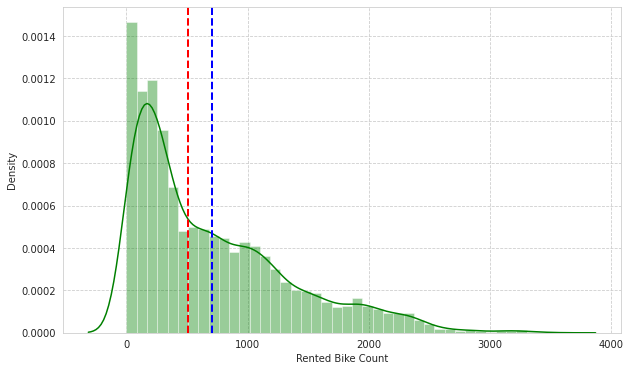

In [ ]:
# Distribution plot of Rented Bike Count:

plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="green")
ax.axvline(df['Rented Bike Count'].mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='red', linestyle='dashed', linewidth=2)
plt.show()



*   In density plot for ***Rented Bike Count*** we can see the median and mean lies in range of 500 to 1000 mean is slightly **greater than median** which means its ***positively skewed***.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


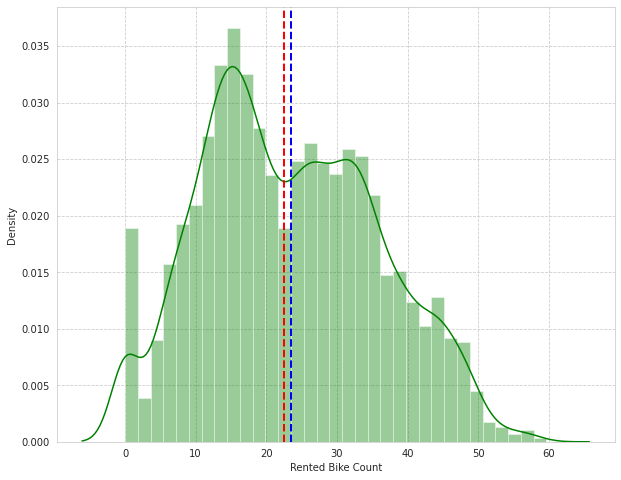

In [ ]:
#Applying square root to Rented Bike Count to reduce skewness:

plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="green")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

In [ ]:
# Applying square root to Rented Bike Count column:

df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])

In [ ]:
# Defining function for plotting y test  and y train values:

def get_linear_graph(pred_value , y_test ):
  plt.figure(figsize=(15,7))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

In [ ]:
# defining function for feature importance:

def get_feat_imp(model):
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  feat_importances.nlargest(10).plot(kind='barh', color= 'red')
  plt.show()

## #Data preparation:-

In [ ]:
# Creating copy of data:
# Creating copy of data:

data= df.copy()

In [ ]:
# Create the data of dependent and independent variables:

y = data['Rented Bike Count']
X = data.drop(columns=['Rented Bike Count'], axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [ ]:
# Transforming data:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **#Linear Regression:-**

In [ ]:
# Fitting onto Linear regression Model:

reg= LinearRegression().fit(X_train, y_train)


In [ ]:
# Getting the X_train and X-test value:

y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

### **Evluation Matrix for Linear Regression.**

In [ ]:
# Calculate MSE, MAE, R2 for training data:


MSEl = mean_squared_error((y_train), (y_pred_train))
MAEl= mean_absolute_error(y_train, y_pred_train)
r2l = r2_score(y_train, y_pred_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:


MSEtestl = mean_squared_error((y_test), (y_pred_test))
MAEtestl= mean_absolute_error(y_test, y_pred_test)
r2testl = r2_score(y_test, y_pred_test)

In [ ]:
# Printing Errors:

print('Training Errors\nMSE:', MSEl , '\nMAE:' , MAEl , '\nR2:',round((r2l),3))
print('\n\nTesting Errors\nMSE:', MSEtestl , '\nMAE:' , MAEtestl , '\nR2:',round((r2testl),3))

Training Errors
MSE: 34.44349173955271 
MAE: 4.4365461219082425 
R2: 0.779


Testing Errors
MSE: 34.12203316134437 
MAE: 4.365751447474075 
R2: 0.774


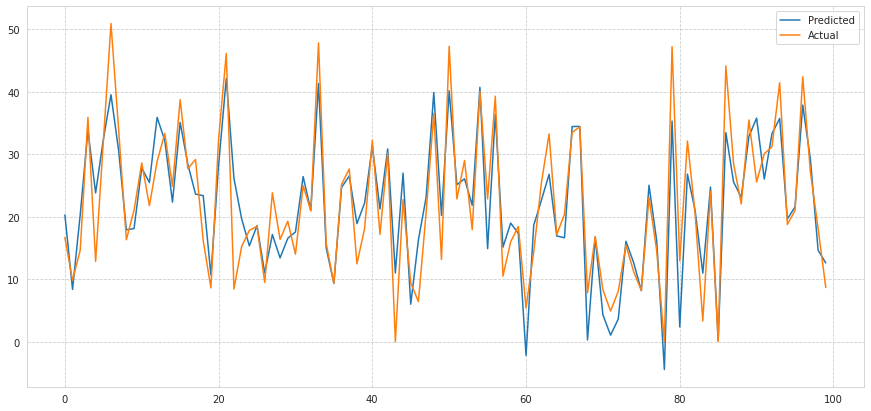

In [ ]:
get_linear_graph(y_pred_test , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict1={'Model':'Linear regression ',
       'MAE':round((MAEl),3),
       'MSE':round((MSEl),3),
       'R2_score':round((r2l),3),
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# storing the test set metrics value in a dataframe for later comparison:
dict2={'Model':'Linear regression ',
       'MAE':round((MAEtestl),3),
       'MSE':round((MSEtestl),3),
       'R2_score':round((r2testl),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

### **#Polynomial Regression:-**

In [ ]:
# Fitting training data onto Polynomial regression Model :

poly_reg = PolynomialFeatures(degree = 2)

In [ ]:
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
# Fitting training data onto Polynomial regression Model:

poly = LinearRegression().fit(X_poly, y_train)

In [ ]:
# Getting the y_train and y-test value:

y_pred_poly_train = poly.predict(X_poly)
y_pred_poly_test= poly.predict(X_poly_test)

### Evaluation Matrix for Polynomial Regression:-

In [ ]:
# Calculate MSE, MAE, R2 for training data:

MSEp = mean_squared_error((y_train), (y_pred_poly_train))
MAEp= mean_absolute_error(y_train, y_pred_poly_train)
r2p = r2_score(y_train, y_pred_poly_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:

MSEtestp = mean_squared_error((y_test), (y_pred_poly_test))
MAEtestp= mean_absolute_error(y_test, y_pred_poly_test)
r2testp = r2_score(y_test, y_pred_poly_test)

In [ ]:
# Printing Errors:

print('Training Errors\nMSE:', MSEp , '\nMAE:' , MAEp , '\nR2:',round((r2p),2))
print('\n\nTesting Errors\nMSE:', MSEtestp , '\nMAE:' , MAEtestp , '\nR2:',round((r2testp),2))

Training Errors
MSE: 11.506505704105592 
MAE: 2.2511655295718582 
R2: 0.93


Testing Errors
MSE: 14.630990147083063 
MAE: 2.5403303963083994 
R2: 0.9


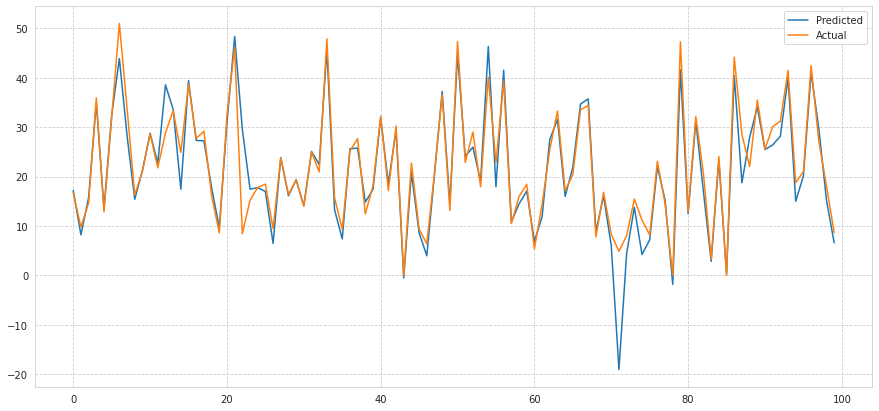

In [ ]:
get_linear_graph(y_pred_poly_test , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict1={'Model':'Polynomial regression ',
       'MAE':round((MAEp),3),
       'MSE':round((MSEp),3),
       'R2_score':round((r2p),3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison:

dict2={'Model':'Polynomial regression ',
       'MAE':round((MAEtestp),3),
       'MSE':round((MSEtestp),3),
       'R2_score':round((r2testp),3)
       }
test_df=test_df.append(dict2,ignore_index=True)

### **#Decision Tree Regressor:-**

In [ ]:
# Creating object wth Decision tree regressor with critera of mean squared error, maximum depth being 10, maximum leaf noodes being 120:

decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_leaf_nodes=120)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120)

In [ ]:
# Getting the y_train and y-test value:

y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

### **#Evaluation Matrix for Decision Tree Regressor:-**

In [ ]:
# Calculate MSE, MAE, R2 for training data:


MSEdt = mean_squared_error((y_train), (y_pred_train_d))
MAEdt = mean_absolute_error(y_train, y_pred_train_d)
r2dt = r2_score(y_train, y_pred_train_d)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:


MSEtestdt = mean_squared_error((y_test), (y_pred_test_d))
MAEtestdt = mean_absolute_error(y_test, y_pred_test_d)
r2testdt = r2_score(y_test, y_pred_test_d)

In [ ]:
# Printing Errors:

print('Training Errors\nMSE:', MSEdt , '\nMAE:' , MAEdt , '\nR2:',round((r2dt),3))
print('\n\nTesting Errors\nMSE:', MSEtestdt , '\nMAE:' , MAEtestdt , '\nR2:',round((r2testdt),3))

Training Errors
MSE: 25.793982334841054 
MAE: 3.721017918827504 
R2: 0.835


Testing Errors
MSE: 29.807395087531816 
MAE: 3.9677881461060367 
R2: 0.803


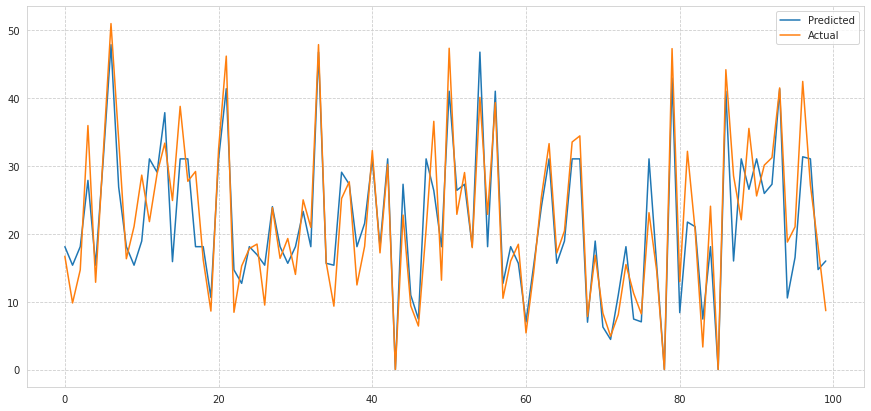

In [ ]:
get_linear_graph(y_pred_test_d , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict1={'Model':'Decision Tree Regression ',
       'MAE':round((MAEdt),3),
       'MSE':round((MSEdt),3),
       'R2_score':round((r2dt),3),
}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Decision Tree Regression ',
       'MAE':round((MAEtestdt),3),
       'MSE':round((MSEtestdt),3),
       'R2_score':round((r2testdt),3),
}
test_df=test_df.append(dict2,ignore_index=True)

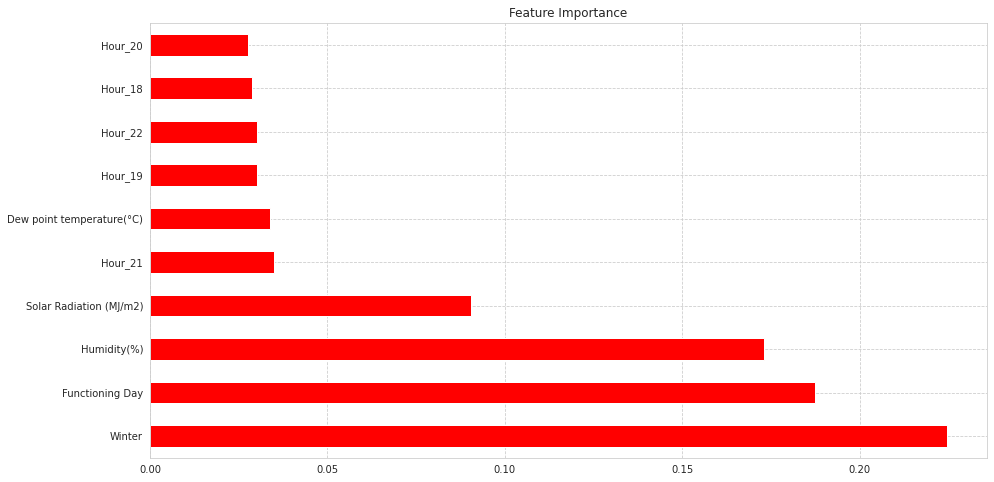

In [ ]:
get_feat_imp(decision_regressor)



*   List itemHere we can see ***Hour_20*** is showing least feature importance while **Winter season** is showing highest feature importance in model prediction.




### **#Random Forrest Regressor:-**

In [ ]:
rfc = RandomForestRegressor(n_estimators = 180, random_state = 21 ,criterion= 'mse',max_depth=13 ,max_leaf_nodes= 80)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=13, max_leaf_nodes=80,
                      n_estimators=180, random_state=21)

In [ ]:
# Prediction on train dataset:

y_pred_trainrfc = rfc.predict(X_train)

In [ ]:
#Prediction on test dataset:

y_pred_testrfc = rfc.predict(X_test)

### **#Evaluation Matrix for Random Forest:-**

In [ ]:
# Calculate MSE, MAE, R2 for training data:


MSErfc = mean_squared_error(y_train, y_pred_trainrfc)
MAErfc = mean_absolute_error(y_train, y_pred_trainrfc)
r2rfc = r2_score(y_train, y_pred_trainrfc)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:


MSEtestrf = mean_squared_error((y_test), (y_pred_testrfc))
MAEtestrf = mean_absolute_error(y_test, y_pred_testrfc)
r2testrf = r2_score(y_test, y_pred_testrfc)


In [ ]:
# Printing Errors:

print('Training Errors\nMSE:', MSErfc , '\nMAE:' , MAErfc , '\nR2:',round((r2rfc),3))
print('\n\nTesting Errors\nMSE:', MSEtestrf , '\nMAE:' , MAEtestrf , '\nR2:',round((r2testrf),3))

Training Errors
MSE: 17.410712899141867 
MAE: 3.107133318857302 
R2: 0.888


Testing Errors
MSE: 18.8454619617235 
MAE: 3.1542327512216732 
R2: 0.875


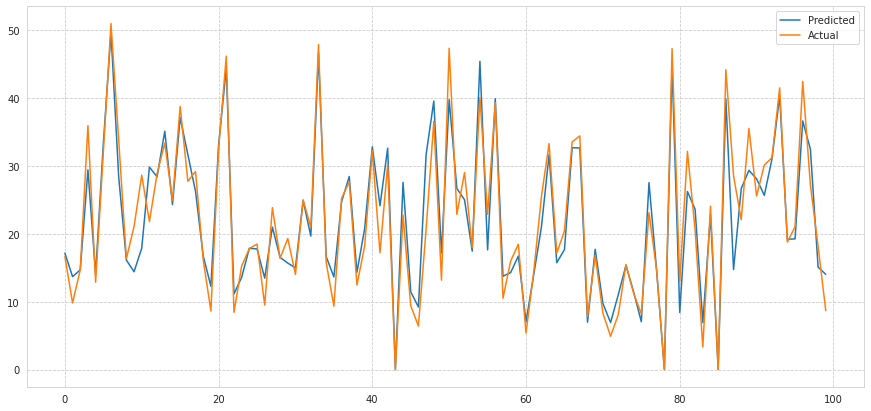

In [ ]:
get_linear_graph(y_pred_testrfc , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict1={'Model':'Random Forrest ',
       'MAE':round((MAErfc),3),
       'MSE':round((MSErfc),3),
       'R2_score':round((r2rfc),3)}
       
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict2={'Model':'Random Forrest ',
       'MAE':round((MAEtestrf),3),
       'MSE':round((MSEtestrf),3),
       'R2_score':round((r2testrf),3)}
       
test_df=test_df.append(dict2,ignore_index=True)

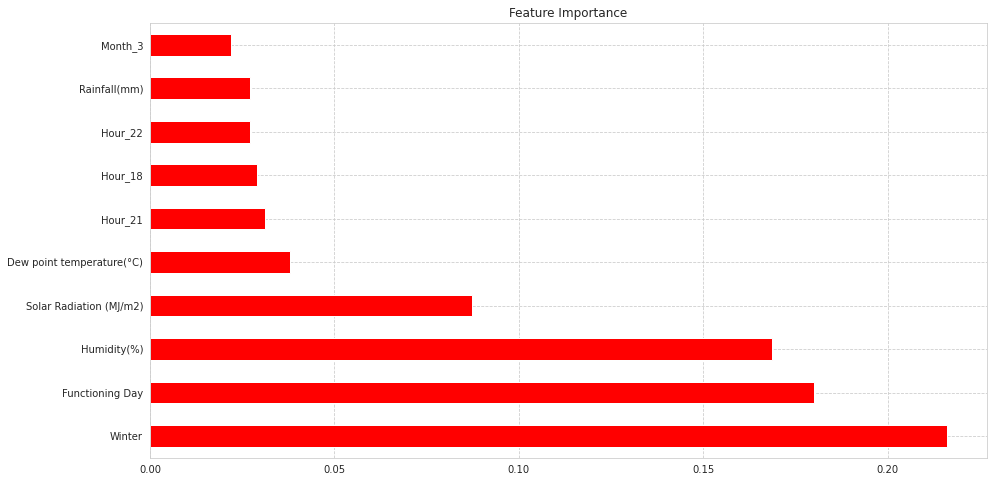

In [ ]:
get_feat_imp(rfc)

Here we can see ***Month_3*** is showing least feature importance while **Winter season** is showing highest feature importance in model prediction.
